In [1]:
import pandas as pd
from pyaugsynth import Dataprep, Synth

In [2]:
df = pd.read_csv('texas.csv')

dataprep = Dataprep(
    foo=df,
    predictors=('bmprison', 'income', 'ur', 'poverty'),
    predictors_op='mean',
    time_predictors_prior=range(1985, 2001),
    special_predictors=(
        ('bmprison', [1988] ,'mean'),
        ('bmprison', [1990], 'mean'),
        ('bmprison', [1991], 'mean'),
        ('bmprison', [1992], 'mean'),
        ('alcohol', [1990], 'mean'),
        ('aidscapita', [1990], 'mean'),
        ('aidscapita', [1991], 'mean'),
        ('black', [1990], 'mean'),
        ('black', [1991], 'mean'),
        ('black', [1992], 'mean'),
        ('perc1519', [1990], 'mean')
    ),
    dependent='bmprison',
    unit_variable='state',
    time_variable='year',
    treatment_identifier='Texas',
    controls_identifier=('Alabama', 'Alaska', 'Arizona', 'Arkansas',
        'California', 'Colorado', 'Connecticut', 'Delaware',
        'District of Columbia', 'Florida', 'Georgia', 'Hawaii',
        'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
        'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
        'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
        'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
        'New York', 'North Carolina', 'North Dakota', 'Ohio',
        'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
        'South Carolina', 'South Dakota', 'Tennessee', 'Utah',
        'Vermont', 'Virginia', 'Washington', 'West Virginia',
        'Wisconsin', 'Wyoming'),
    time_optimize_ssr=range(1985, 1994)
)

synth = Synth()
synth.fit(dataprep=dataprep, optim_method='BFGS', optim_initial='ols')

In [3]:
synth.weights(threshold=0.001)

California    0.394
Florida       0.095
Illinois      0.394
Louisiana     0.117
Name: weights, dtype: float64

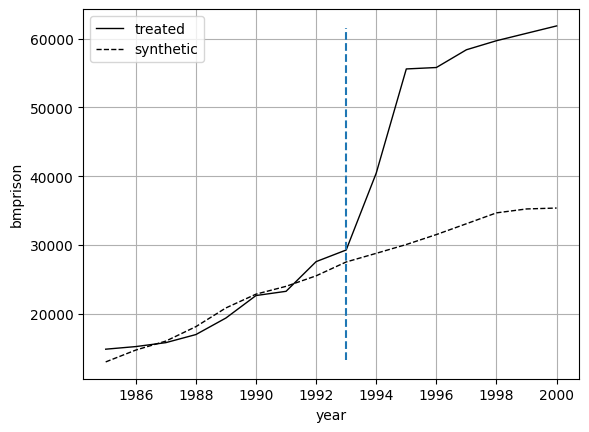

In [4]:
synth.path_plot(treatment_time=1993)

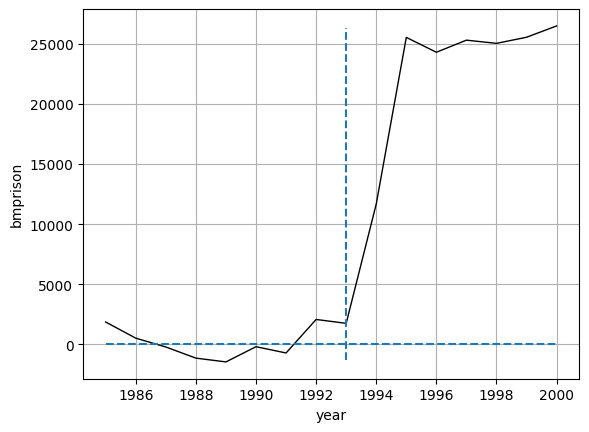

In [5]:
synth.gaps_plot(treatment_time=1993)